In [2]:
import pandas as pd
import numpy as np
import ast
from collections import Counter
import matplotlib.pyplot as plt
import seaborn

In [3]:
seaborn.set()

In [4]:
data = pd.read_csv('benedictquinn_300_music.csv')
data.head(3)

,user_name,signature,verified,basic_stats,collabs,music_collabs,hashtags
0,benedictquinn,oh hey!\r\nguitarist and producer \r\ngo follo...,False,follower_count : 814\nfollowing_count : 143\nl...,jasmineoakleymusic\nitsolihannaford,jasmineoakleymusic : https://tiktok.com/@bened...,"instruments : guitar (15), bass (8), drums (1)..."
1,johnmarknelson,music maker in los angeles,False,follower_count : 12600\nfollowing_count : 76\n...,christofersco21\nsofiamillsmusic,christofersco21 : https://tiktok.com/@johnmark...,"instruments : guitar (19), bass (19), piano (9..."
2,jasmineoakleymusic,"Artist, my debut single ‘Gone’ out now ⬇️",False,follower_count : 5522\nfollowing_count : 67\nl...,tenitinks1\npastelmusique\nbenedictquinn\nthat...,tenitinks1 : https://tiktok.com/@jasmineoakley...,"instruments : guitar (10), bass (3), piano (2)..."


In [5]:
instruments = []
styles = []
others = []
collabs_df = []
music_collabs_df = []
follower_count = []
following_count = []
likes_count = []
video_count = []
last_active = []
freq_post = []

for i in range(len(data)):    
    hashtags_cat = str(data.hashtags[i]).split('\n')
    hashtags_cat.pop()
    hashtags_cat_words = [cat.split(': ')[1] for cat in hashtags_cat]
    instr_all = hashtags_cat_words[0].split(', ')
    if instr_all != [' ']:
        instr = [i.split(' (')[0] for i in instr_all]
    else:
        instr = ['None']
    sty_all = hashtags_cat_words[1].split(', ')
    if sty_all != [' ']:
        sty = [s.split(' (')[0] for s in sty_all]
    else:
        sty_count = [0]
    othe = hashtags_cat_words[2].split(', ')
    instruments.append(instr)
    styles.append(sty)
    others.append(othe)
    
    coll = str(data.collabs[i]).split("\n")
    coll.pop()
    collabs_df.append(coll)

    music_coll = str(data.music_collabs[i]).split("\n")
    music_coll.pop()
    music_collabs_df.append(music_coll)
    
    stats_cat = data.basic_stats[i].split("\n")
    stats_cat.pop()
    stats_cat_words = [cat.split(':')[1] for cat in stats_cat]
    follower_c = stats_cat_words[0]
    following_c = stats_cat_words[1]
    likes_c = stats_cat_words[2]
    video_c = stats_cat_words[3]
    last_a = stats_cat_words[4]
    freq_p = str(stats_cat_words[5]).replace(' days', '')
    follower_count.append(follower_c)
    following_count.append(following_c)
    likes_count.append(likes_c)
    video_count.append(video_c)
    last_active.append(last_a)
    freq_post.append(freq_p)

In [6]:
data['instruments'] = instruments
data['styles'] = styles
data['others'] = others
data['collabs_df'] = collabs_df
data['music_collabs_df'] = music_collabs_df
data['follower_count'] = follower_count
data['following_count'] = following_count
data['likes_count'] = likes_count
data['video_count'] = video_count
data['last_active'] = last_active
data['freq_post'] = freq_post
data[['follower_count', 'following_count', 'likes_count', 'video_count','freq_post']] = data[['follower_count', 'following_count', 'likes_count', 'video_count','freq_post']].apply(pd.to_numeric)

data = data.drop(['signature', 'basic_stats', 'collabs', 'music_collabs', 'hashtags'], axis=1)

In [7]:
data.head(5)

,user_name,verified,instruments,styles,others,collabs_df,music_collabs_df,follower_count,following_count,likes_count,video_count,last_active,freq_post
0,benedictquinn,False,"[guitar, bass, drums, synth, chords]","[jazz, rnb, hiphop, indie, groove, neosoul, in...","[asktiktok, music, instrumental, chill, lofi, ...",[jasmineoakleymusic],[jasmineoakleymusic : https://tiktok.com/@bene...,814,143,5005,70,2020-07-01,12
1,johnmarknelson,False,"[guitar, bass, piano, drums]",[lofi],"[duet, greenscreen, guitar, bass, lofi, fy, fy...",[christofersco21],[christofersco21 : https://tiktok.com/@johnmar...,12600,76,77000,82,2021-01-27,1
2,jasmineoakleymusic,False,"[guitar, bass, piano, drums]","[jazz, rap, rnb, neosoul, gospel]","[fy, fyp, rnb, ifiaintgotyou, aliciakeys, ifia...","[tenitinks1, pastelmusique, benedictquinn]",[tenitinks1 : https://tiktok.com/@jasmineoakle...,5522,67,65700,66,2020-12-13,10
3,itsolihannaford,False,"[bass, drums]","[jazz, neosoul, lofi]","[jazz, beats, lofibeats, neosoul, jam, jazzgui...",[benedictquinn],[benedictquinn : https://tiktok.com/@itsolihan...,67,26,221,3,2020-08-06,8
4,sofiamillsmusic,False,[],[],"[superbowl, 2022, originalsong, indieartist, f...","[jc0fc, rronniesings, lostmymarblesagain, plan...",[rronniesings : https://tiktok.com/@sofiamills...,3421,620,54000,201,2018-12-07,1


<AxesSubplot:title={'center':'Distribution du nombre de followers par utilisateur'}, ylabel='Frequency'>

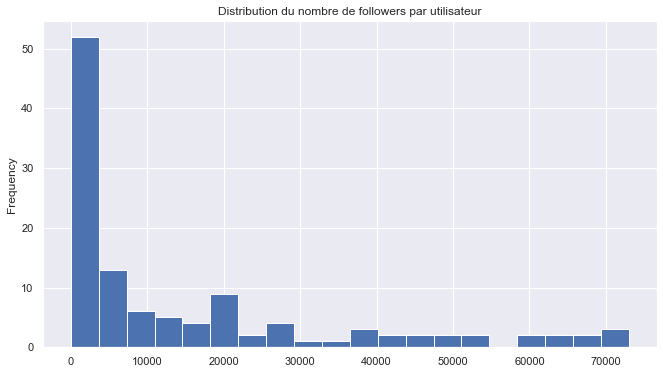

In [8]:
data.follower_count.plot.hist(title = 'Distribution du nombre de followers par utilisateur', figsize=(11, 6), bins=20)

<AxesSubplot:title={'center':'Distribution du nombre de followings par utilisateur'}, ylabel='Frequency'>

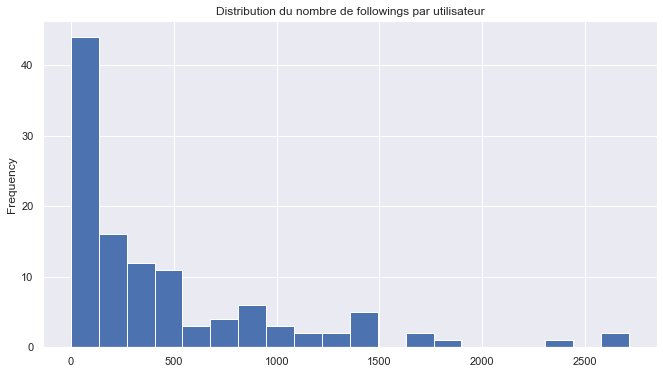

In [9]:
data[data['following_count'] < 3000].following_count.plot.hist(title = 'Distribution du nombre de followings par utilisateur', figsize=(11, 6), bins=20)

<AxesSubplot:title={'center':'Distribution du nombre de likes par utilisateur'}, ylabel='Frequency'>

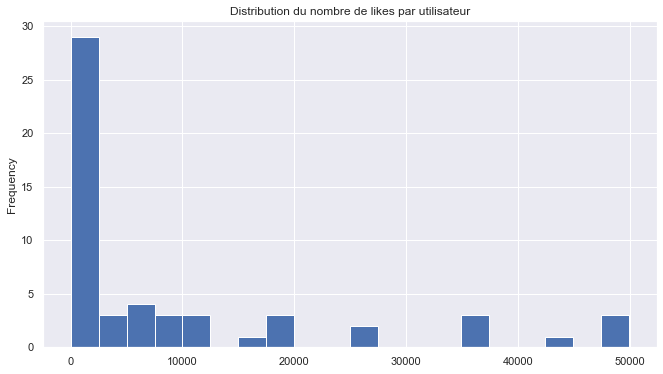

In [10]:
data[data['likes_count'] < 50000].likes_count.plot.hist(title = 'Distribution du nombre de likes par utilisateur', figsize=(11, 6), bins=20)

Text(0.5, 1.0, 'Nombre de collabs')

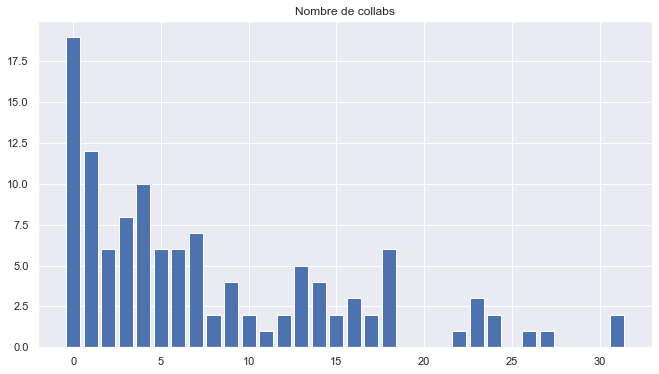

In [11]:
fig, ax = plt.subplots(figsize=(11,6))

H = []
for i in range(len(data)):
    H.append(len(data.collabs_df[i]))
counter = Counter(H)
res = Counter({k: c for k, c in counter.items()})
plt.bar(res.keys(), res.values())
plt.title('Nombre de collabs')

Text(0.5, 1.0, 'Nombre de collabs musicales')

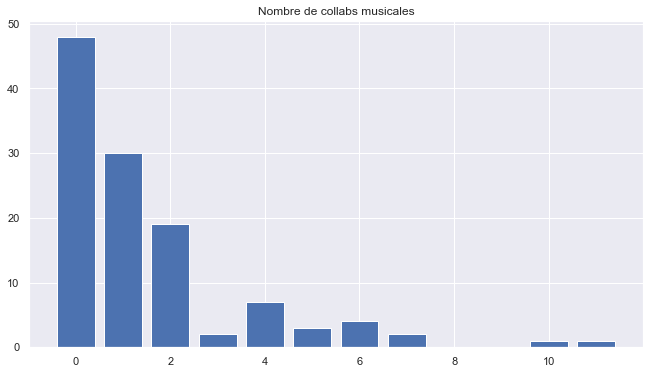

In [12]:
fig, ax = plt.subplots(figsize=(11,6))

H = []
for i in range(len(data)):
    H.append(len(data.music_collabs_df[i]))
counter = Counter(H)
res = Counter({k: c for k, c in counter.items()})
plt.bar(res.keys(), res.values())
plt.title('Nombre de collabs musicales')

Text(0.5, 1.0, 'Les hashtags les plus utilisés')

C:\Users\remij\Miniconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 12471 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\remij\Miniconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 12471 missing from current font.
  font.set_text(s, 0, flags=flags)


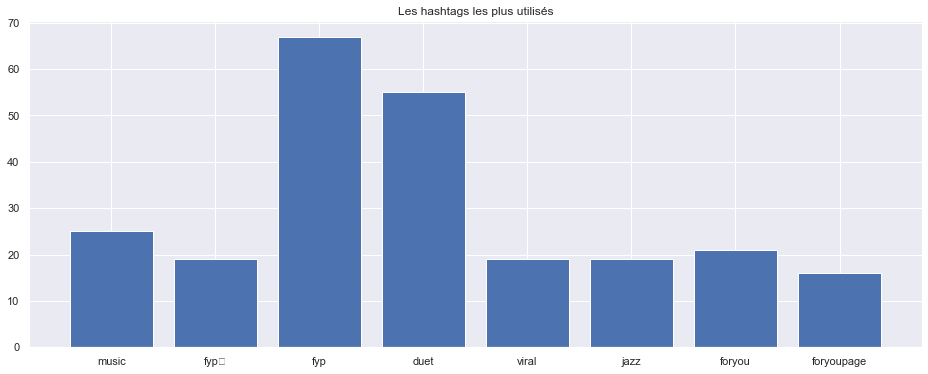

In [14]:
fig, ax = plt.subplots(figsize=(16,6))

H = []
for i in range(len(data)):
    H_line = data.others[i]
    for w in H_line:
         H.append(w)

counter = Counter(H)
res = Counter({k: c for k, c in counter.items() if c > 15})
plt.bar(res.keys(), res.values())
plt.title('Les hashtags les plus utilisés')

Text(0.5, 1.0, 'Les instruments les plus cités')

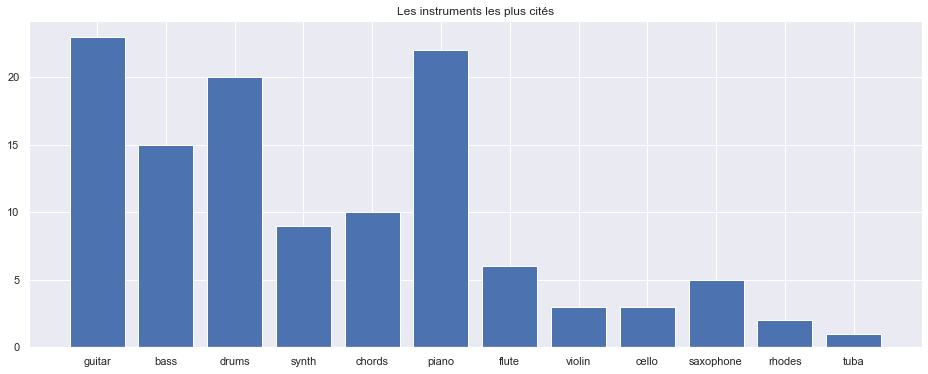

In [15]:
fig, ax = plt.subplots(figsize=(16,6))

H = []
for i in range(len(data)):
    H_line = data.instruments[i]
    for w in H_line:
        if w:
             H.append(w)

counter = Counter(H)
res = Counter({k: c for k, c in counter.items()})
plt.bar(res.keys(), res.values())
plt.title('Les instruments les plus cités')

Text(0.5, 1.0, 'Les styles les plus cités')

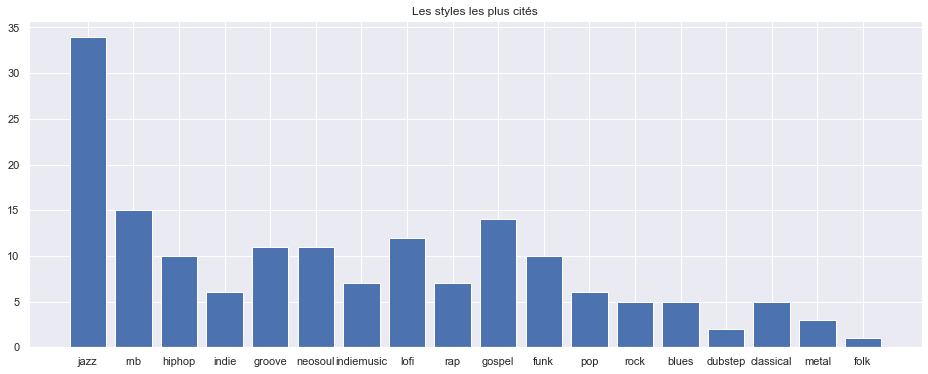

In [16]:
fig, ax = plt.subplots(figsize=(16,6))

H = []
for i in range(len(data)):
    H_line = data.styles[i]
    for w in H_line:
        if w:
         H.append(w)

counter = Counter(H)
res = Counter({k: c for k, c in counter.items()})
plt.bar(res.keys(), res.values())
plt.title('Les styles les plus cités')